## Import Libraries

In [1]:
import numpy as np
import cv2
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from keras.preprocessing import image
from numpy.lib.shape_base import expand_dims
from keras_preprocessing.image.utils import img_to_array
%matplotlib notebook

# 7.1 Effects of interpolation techniques in Image Resizing

<IPython.core.display.Javascript object>


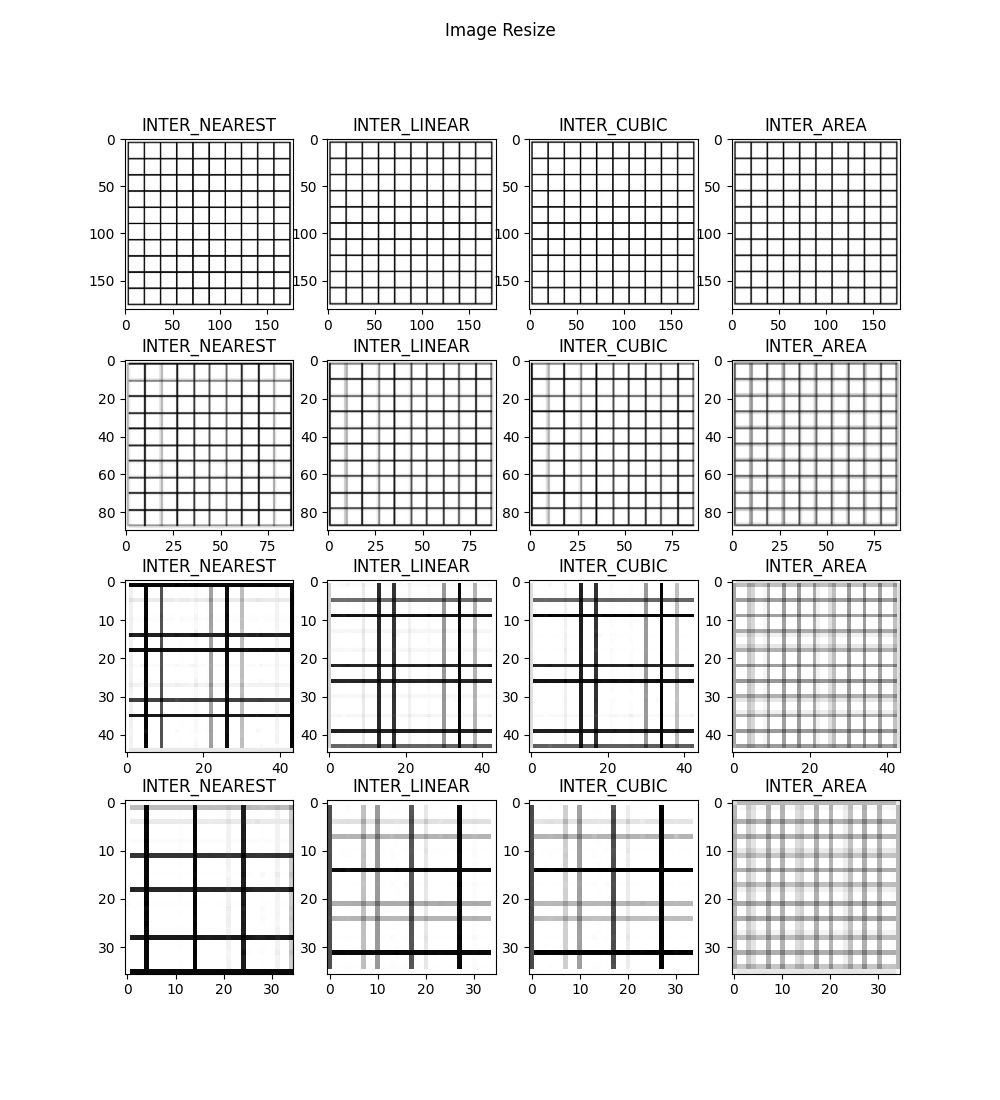

In [2]:
fig = plt.figure(figsize=(10, 11))
fig.suptitle("Image Resize")
rows = 4
columns = 4

#1. Read image file
grid_img = plt.imread('./Grid_Image.JPG')


#2. Define resize factor
reduce_factors = np.array([2, 4, 8, 10])
scale_factors = 1 / reduce_factors

#Define interpolation method
inter_methods = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA]

#3. Display results using each scale factors & interpolation method
i = 1
for scale_factor in scale_factors:
  for inter_method in inter_methods:
    width = int(grid_img.shape[1] * scale_factor)
    height = int(grid_img.shape[0] * scale_factor)
    dim = (width, height)

    resized = cv2.resize(grid_img, dim, interpolation = inter_method)

    fig.add_subplot(rows, columns, i)
    plt.imshow(resized)

    if inter_method == 0: title = 'INTER_NEAREST'
    if inter_method == 1: title = 'INTER_LINEAR'
    if inter_method == 2: title = 'INTER_CUBIC'
    if inter_method == 3: title = 'INTER_AREA'

    plt.title(title)
    i += 1

<IPython.core.display.Javascript object>


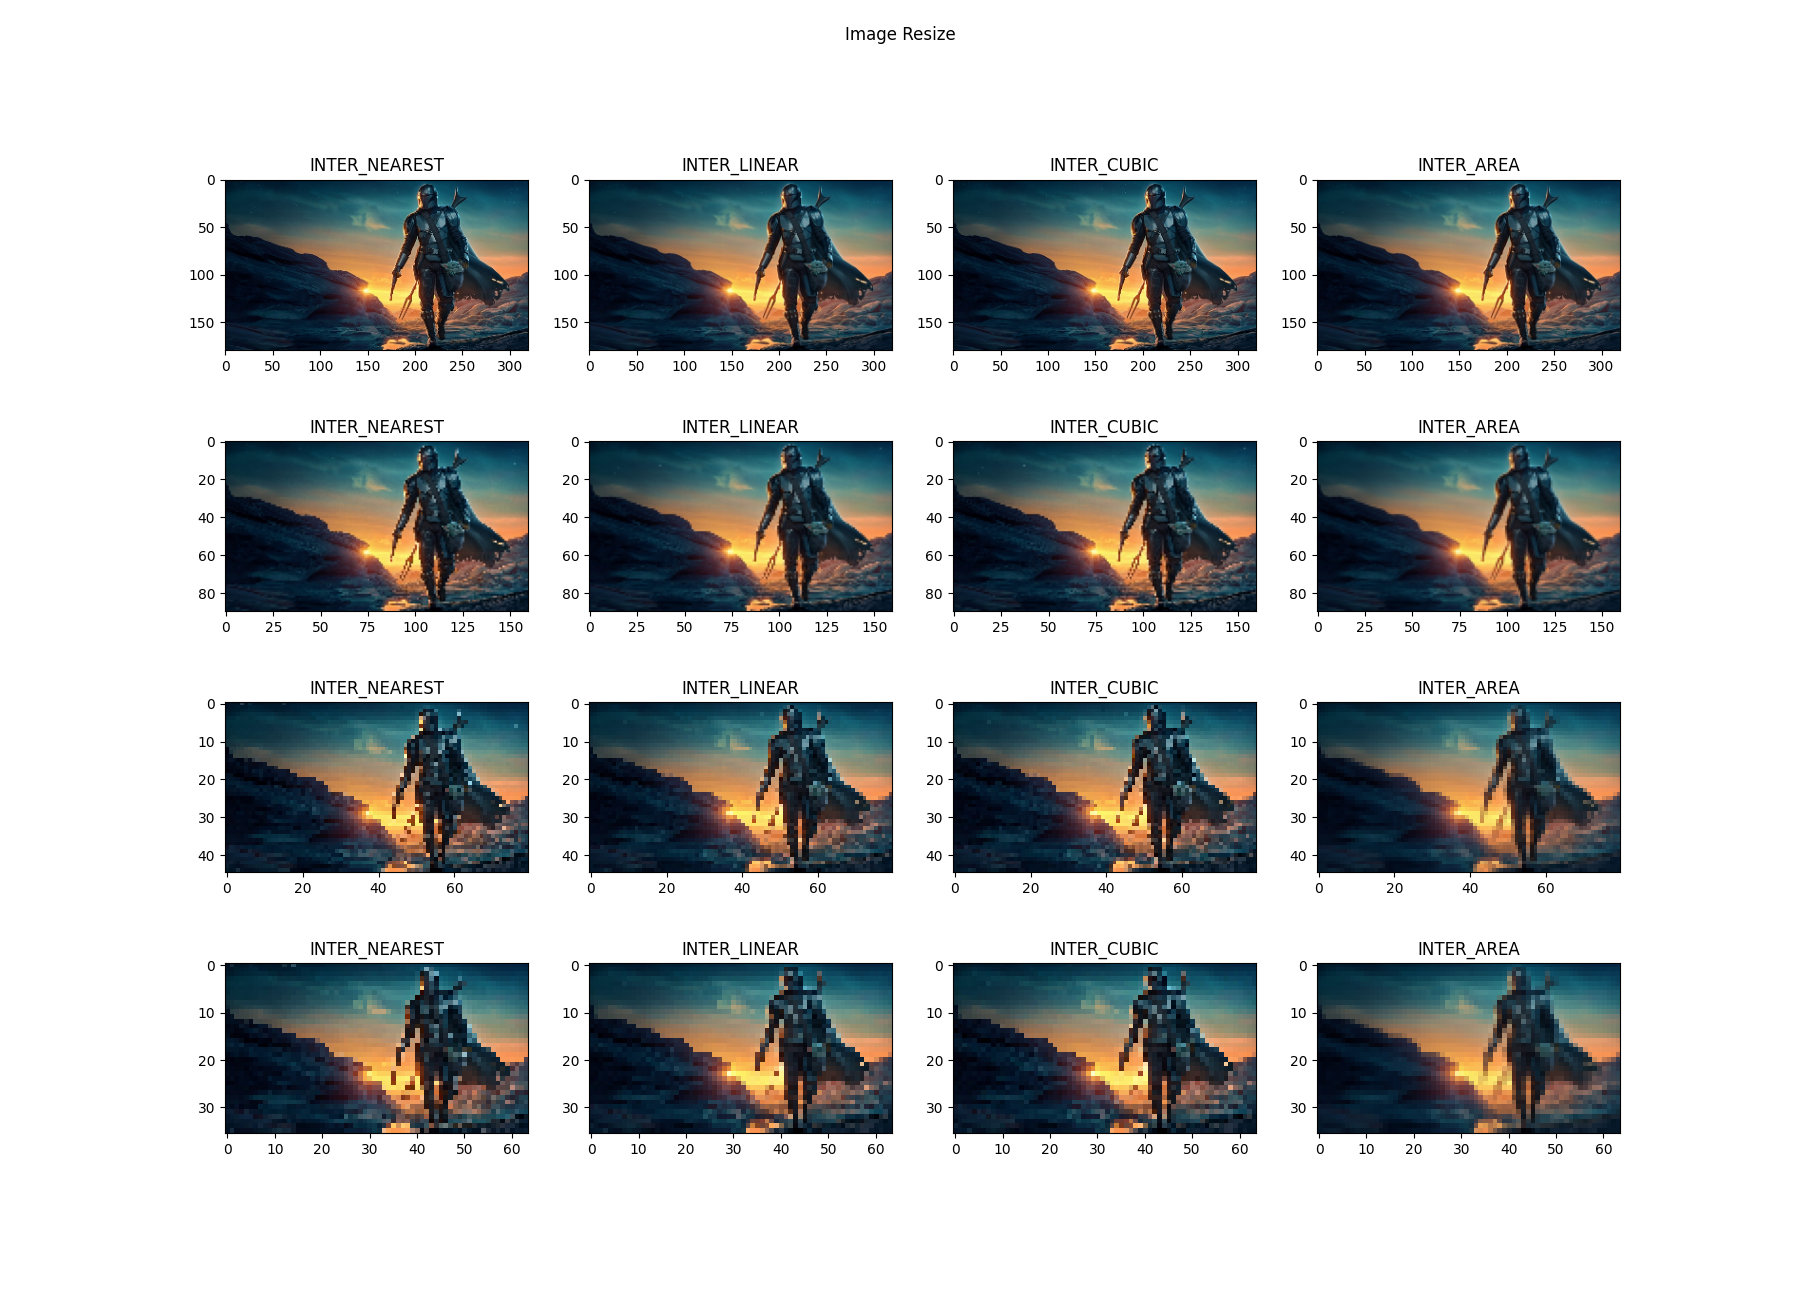

In [3]:
fig = plt.figure(figsize=(18, 13))
fig.suptitle("Image Resize")
rows = 4
columns = 4

#Read image file
img = plt.imread('./manda.jpg')


#Display results using each scale factors & interpolation method
i = 1
for scale_factor in scale_factors:
  for inter_method in inter_methods:
    width = int(img.shape[1] * scale_factor)
    height = int(img.shape[0] * scale_factor)
    dim = (width, height)

    resized = cv2.resize(img, dim, interpolation = inter_method)

    fig.add_subplot(rows, columns, i)
    plt.imshow(resized)

    if inter_method == 0: title = 'INTER_NEAREST'
    if inter_method == 1: title = 'INTER_LINEAR'
    if inter_method == 2: title = 'INTER_CUBIC'
    if inter_method == 3: title = 'INTER_AREA'

    plt.title(title)
    i += 1

---

# 7.2 Image Augmentation Using Keras ImageDataGenerator

<IPython.core.display.Javascript object>


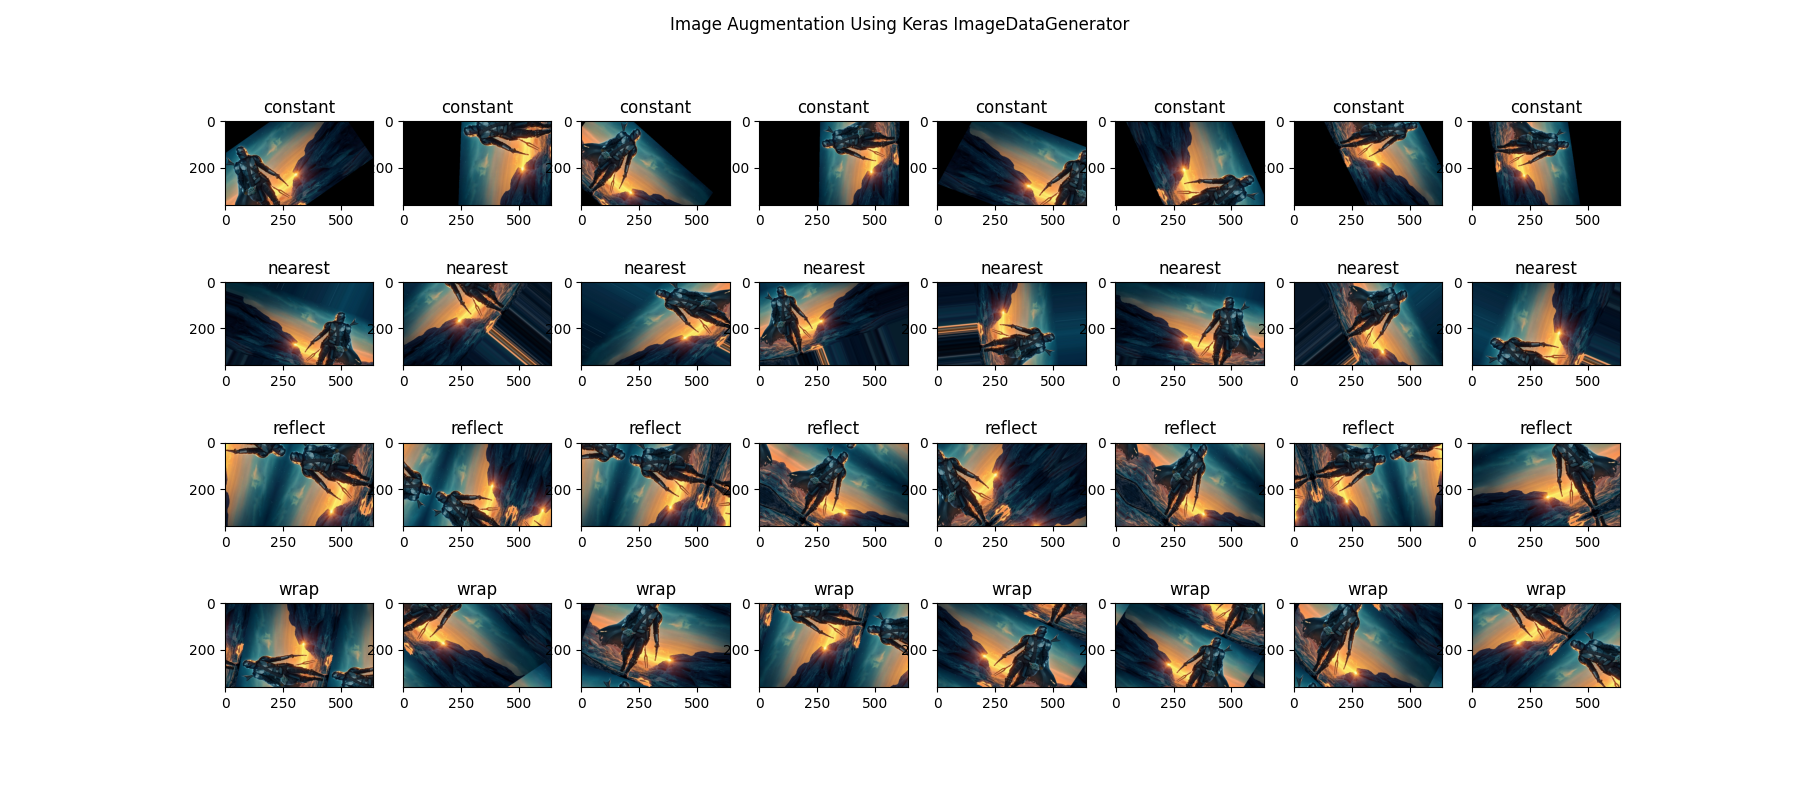

In [5]:
#Image setting
fig = plt.figure(figsize=(18, 8))
fig.suptitle("Image Augmentation Using Keras ImageDataGenerator")
rows = 4
columns = 8

#Video setting
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('image_data_generator.avi',fourcc,4.0,(640,360))

#1. Read image file
img = plt.imread('./manda.jpg')
img = expand_dims(img, axis=0)

#2. Define fill method
fill_methods = ['constant', 'nearest', 'reflect', 'wrap']


#4. Define ImageDataGenerator with parameters
index = 1

for fill_method in fill_methods:
  datagen = ImageDataGenerator(rotation_range=90,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode=fill_method)
  
  #Create our batch of one image
  pic = datagen.flow(img, batch_size = 1)

  #Random generate transformed images and write to a video file
  for i in range(8):
    batch = pic.next()
    img_result = batch[0].astype('uint8')
    img_ready = cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB)
    out.write(img_ready)
    
    fig.add_subplot(rows, columns, index)
    plt.imshow(img_result)
    plt.title(fill_method)
    index += 1

out.release()
cv2.destroyAllWindows()
    